In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append('C:\\Users\\user\\PycharmProjects\\pipeGEM')
from pipeGEM.plotting.heatmap import plot_clustermap
from pipeGEM.plotting.scatter import plot_embedding, plot_PCA

In [74]:
labels = pd.read_csv("../../data/all_info/labels.csv", sep='\t')
tpm = pd.read_csv(Path("../../data/mg_tpm_2203.tsv"), sep='\t', index_col=0)
rle = pd.read_csv(Path("../../data/mg_RLE.tsv"), sep='\t', index_col=0)

In [45]:
labels

,sample,sex,extraction date(not all),group,age,seq date,batch,disease,subgroup
0,R001,M,2019-07-09,4,31.536986,2019-11-08,1,abnormal immune function,inf
1,R002,F,2019-08-08,2,42.301370,2019-11-08,1,mt3243A>G,melas
2,R003,F,2019-08-29,2,42.358904,2019-11-08,1,mt3243A>G,melas
3,R004,M,2019-08-30,3,23.863014,2019-11-08,1,NaN,other
4,R005,M,2019-09-05,2,15.369863,2019-11-08,1,Large deletion,nonmelas
...,...,...,...,...,...,...,...,...,...
61,C008,M,NaN,1,27.778082,2019-11-08,1,NaN,control
62,C009,M,NaN,1,32.035616,2019-11-08,1,NaN,control
63,C010,M,NaN,1,31.778082,2019-11-08,1,NaN,control
64,C011,M,NaN,1,24.287671,2020-08-14,3,NaN,control


In [91]:
labels.loc[(labels["group"] == 4) & (labels["subgroup"] == "met"), "group"] = 5

In [92]:
labels["group"].unique()

array([4, 2, 3, 5, 1], dtype=int64)

In [93]:
labels

,sample,sex,extraction date(not all),group,age,seq date,batch,disease,subgroup
0,R001,M,2019-07-09,4,31.536986,2019-11-08,1,abnormal immune function,inf
1,R002,F,2019-08-08,2,42.301370,2019-11-08,1,mt3243A>G,melas
2,R003,F,2019-08-29,2,42.358904,2019-11-08,1,mt3243A>G,melas
3,R004,M,2019-08-30,3,23.863014,2019-11-08,1,NaN,other
4,R005,M,2019-09-05,2,15.369863,2019-11-08,1,Large deletion,nonmelas
...,...,...,...,...,...,...,...,...,...
61,C008,M,NaN,1,27.778082,2019-11-08,1,NaN,control
62,C009,M,NaN,1,32.035616,2019-11-08,1,NaN,control
63,C010,M,NaN,1,31.778082,2019-11-08,1,NaN,control
64,C011,M,NaN,1,24.287671,2020-08-14,3,NaN,control


In [94]:
labels.to_csv("../../data/all_info/labels_5g.csv", sep='\t', index=False)

In [68]:
gb = labels.groupby("group")["sample"].apply(lambda x: list(x))
groups = {f"G{i+1}": [g + "A" for g in gs] for i, gs in enumerate(gb)}

gb_b = labels.groupby("batch")["sample"].apply(lambda x: list(x))
batches = {f"B{i+1}": [g + "A" for g in gs] for i, gs in enumerate(gb_b)}

In [24]:
tpm = tpm[tpm.T.std() > 1]
tpm = np.log2(tpm + 1)

In [75]:
rle = np.log2(rle + 1)
rle = rle[rle.T.std() > 1]

In [76]:
rle

,C002A,C003A,C004A,C005A,C006A,C007A,C008A,C009A,C010A,C011A,...,R046A,R047A,R048A,R049A,R050A,R053A,R054A,R055A,R056A,R057A
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000971.14,6.189806,5.774302,6.935715,6.428866,5.378701,6.992329,5.651096,6.092909,4.137293,5.994661,...,4.118336,5.308890,3.525872,4.506227,6.128963,5.613472,2.843652,6.846122,5.183814,4.026478
ENSG00000001561.6,7.567478,7.957050,7.498533,7.437311,7.812255,8.227848,7.425692,7.242457,6.826469,8.356584,...,6.020955,6.194565,8.858448,8.630429,8.559792,8.053512,8.163643,9.044430,7.791439,6.915863
ENSG00000002726.18,6.284746,5.788538,2.303927,4.445324,6.790787,4.952371,5.272879,2.416617,6.113407,5.292926,...,0.000000,4.801164,4.687576,2.063265,4.765357,4.322088,2.391662,2.588134,3.118427,0.000000
ENSG00000002933.6,8.990721,8.985378,6.958735,6.440051,9.467010,8.535494,6.281224,4.198235,9.895706,9.007605,...,7.416291,8.439130,7.205347,5.740351,7.352434,7.422633,4.423967,2.861262,6.431237,7.002008
ENSG00000003137.7,0.000000,0.000000,0.727993,0.000000,0.898360,0.855791,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.457564,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000281760.1,2.849362,1.664926,3.252830,2.328572,1.447787,2.902654,1.291942,0.000000,1.156681,1.898731,...,3.489263,2.782413,3.192715,2.979753,3.282768,3.567839,3.247203,3.542637,4.032877,2.168742
ENSG00000281772.1,0.000000,0.000000,0.727993,1.590502,1.844723,1.777895,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.012863,1.641334,0.000000,3.673927,2.679436,2.250932,2.275663,2.168742
ENSG00000281786.1,0.000000,0.000000,0.000000,0.740292,0.000000,1.389293,0.000000,0.785087,0.000000,0.000000,...,0.595972,0.000000,3.081457,2.389314,2.641391,2.874615,2.031810,2.047278,3.353505,2.642578


In [ ]:
sns.set(font_scale=0.5)
plot_clustermap(tpm, {sample_name: grp_name for grp_name, samples in batches.items() for sample_name in samples}, 
                group_list=list(batches.keys()), z_score=0, yticklabels=False, 
                row_cluster=True, row_dendrogram=False, 
                #col_colors=pd.Series(colors),
                palette="YlGnBu",
                #c_bar_label=r"$log_2(TPM + 1)$",
                tree_kws={"linewidths": 3}, fig_size=(10, 20), 
                file_name=Path("../../results/2022March/EDA/TPM_clustermap_batch.png"), prefix="", dpi=600
               )



C:\Users\user\Anaconda3\envs\CBM\lib\site-packages\seaborn\matrix.py:649 UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


saving  ..\..\results\2022March\EDA\TPM_clustermap_groups.png


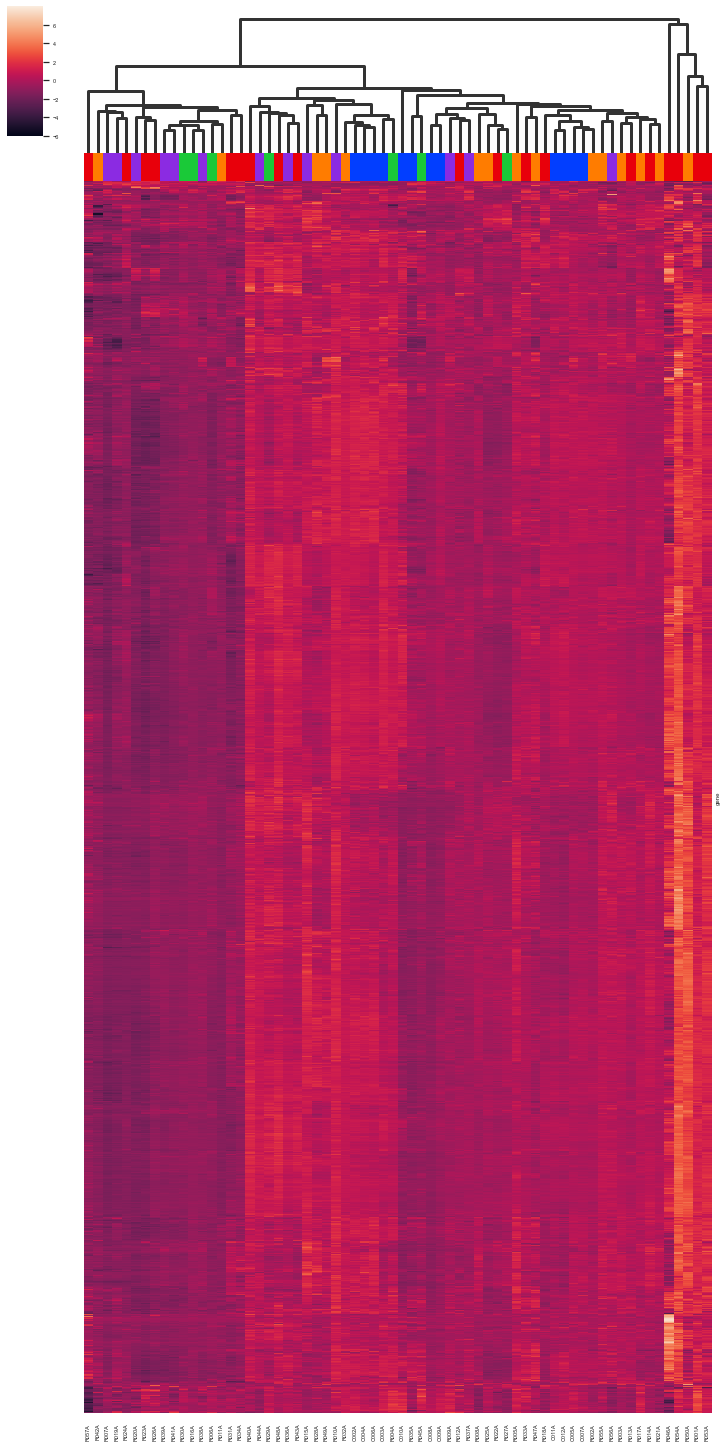

{'g': <seaborn.matrix.ClusterGrid at 0x1a492392978>}

In [70]:
sns.set(font_scale=0.5)
plot_clustermap(tpm, {sample_name: grp_name for grp_name, samples in groups.items() for sample_name in samples}, 
                group_list=list(groups.keys()), z_score=0, yticklabels=False, 
                row_cluster=True, row_dendrogram=False, 
                #col_colors=pd.Series(colors),
                palette="bright",
                #c_bar_label=r"$log_2(TPM + 1)$",
                tree_kws={"linewidths": 3}, fig_size=(10, 20), 
                file_name=Path("../../results/2022March/EDA/TPM_clustermap_groups.png"), prefix="", dpi=600
               )

C:\Users\user\Anaconda3\envs\CBM\lib\site-packages\seaborn\matrix.py:649 UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


saving  ..\..\results\2022March\EDA\RLE_clustermap_groups.png


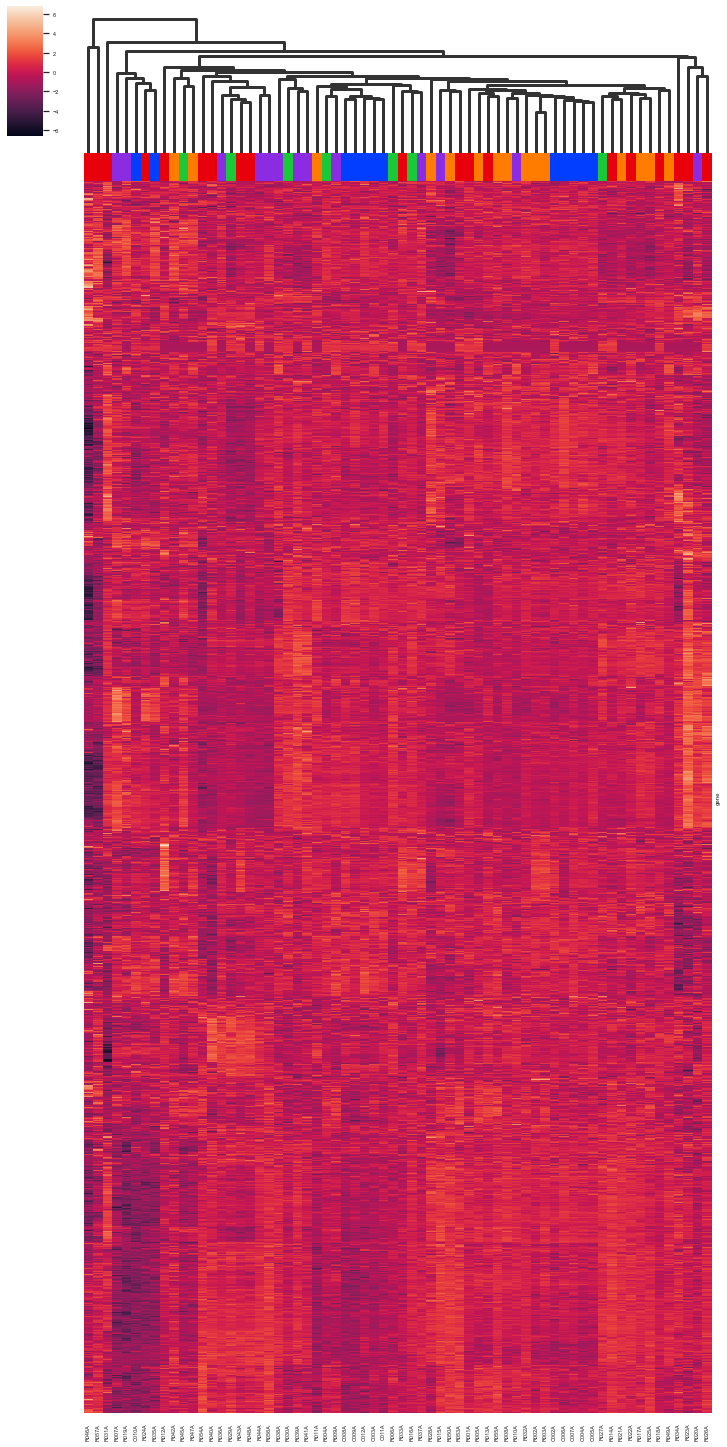

{'g': <seaborn.matrix.ClusterGrid at 0x1a490360fd0>}

In [77]:
sns.set(font_scale=0.5)
plot_clustermap(rle, {sample_name: grp_name for grp_name, samples in groups.items() for sample_name in samples}, 
                group_list=list(groups.keys()), z_score=0, yticklabels=False, 
                row_cluster=True, row_dendrogram=False, 
                #col_colors=pd.Series(colors),
                palette="bright",
                #c_bar_label=r"$log_2(TPM + 1)$",
                tree_kws={"linewidths": 3}, fig_size=(10, 20), 
                file_name=Path("../../results/2022March/EDA/RLE_clustermap_groups.png"), prefix="", dpi=600
               )

In [79]:
def transform_func(x):
    return np.log2(x + 1)

In [80]:
tpm = pd.read_csv(Path("../../data/mg_tpm_2203.tsv"), sep='\t', index_col=0)
rle = pd.read_csv(Path("../../data/mg_RLE.tsv"), sep='\t', index_col=0)

saving  ../../results/2022March/EDA/TSNE.png


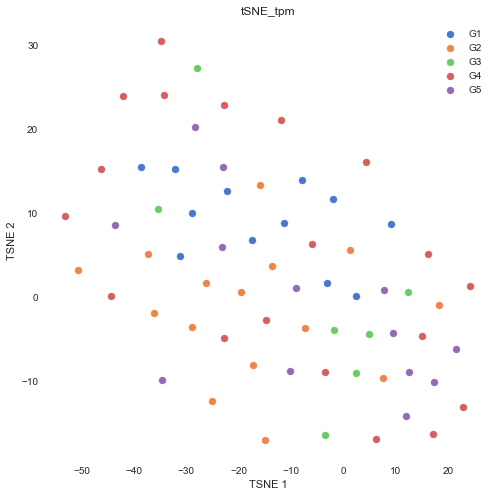

saving  ../../results/2022March/EDA/TSNE_rle.png


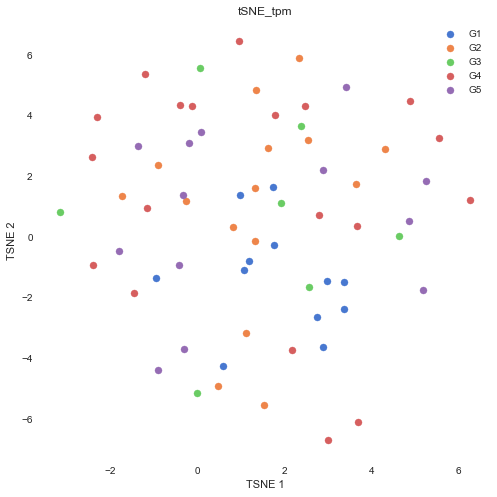

saving  ../../results/2022March/EDA/UMAP.png


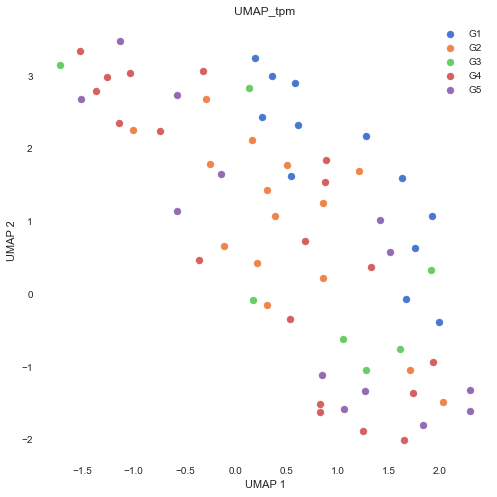

saving  ../../results/2022March/EDA/UMAP_rle.png


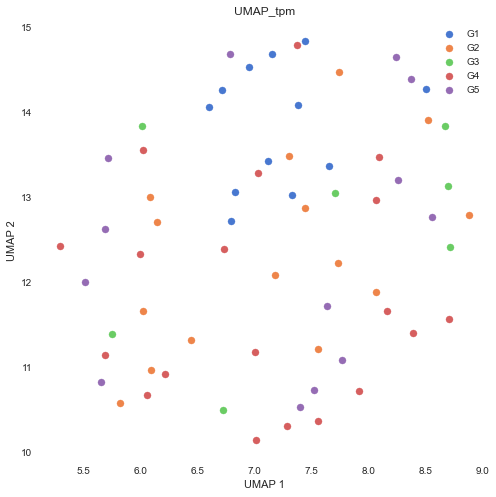

saving  ../../results/2022March/EDA/PCA.png


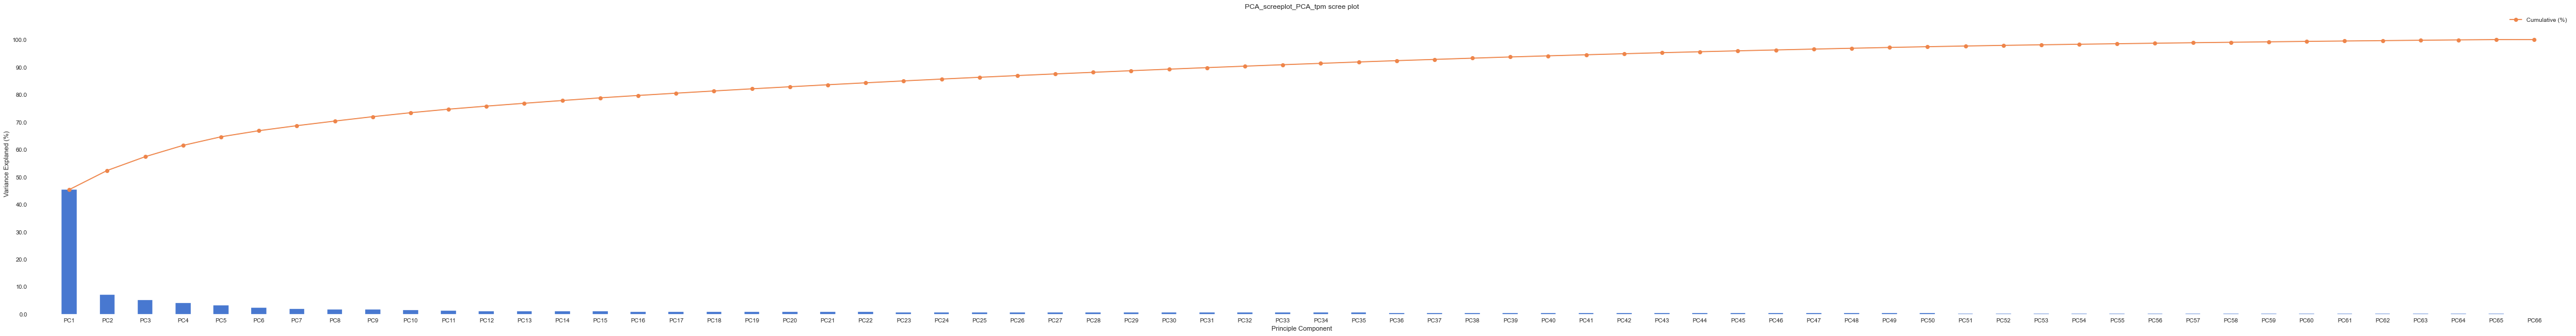

saving  ../../results/2022March/EDA/PCA.png


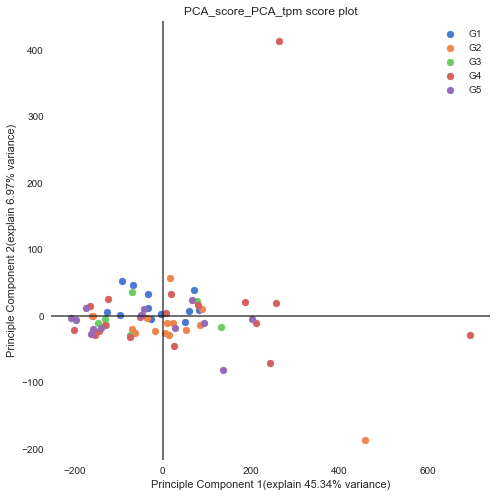

saving  ../../results/2022March/EDA/PCA_rle.png


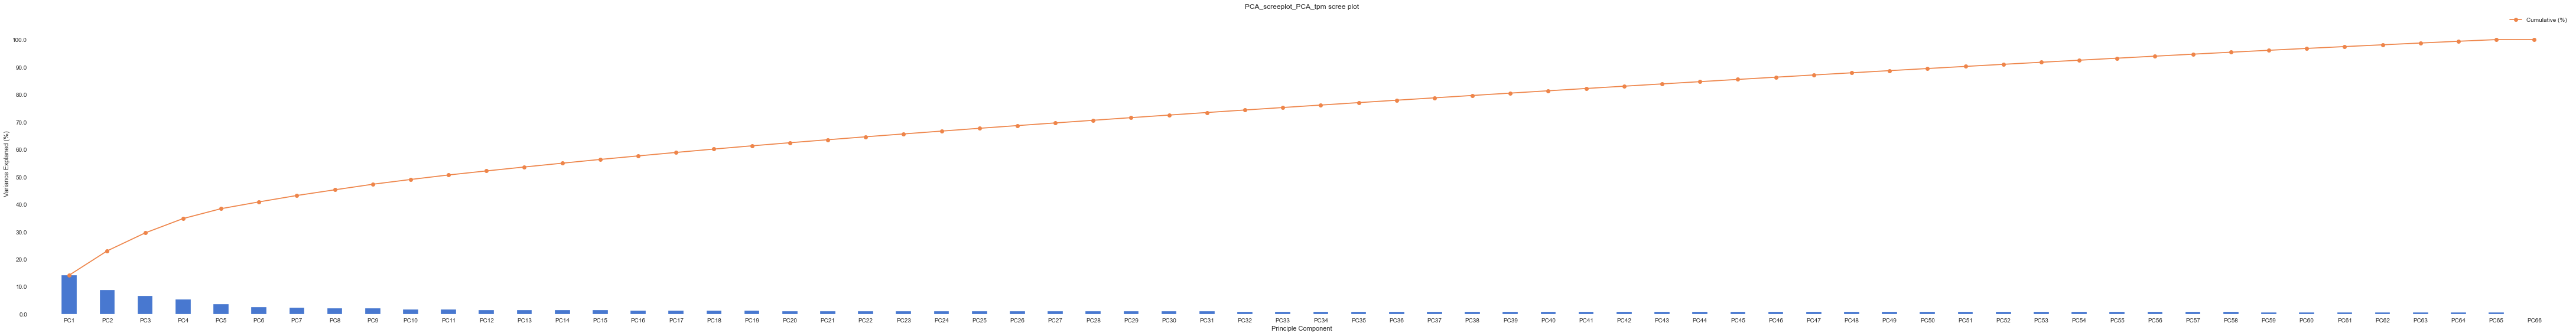

saving  ../../results/2022March/EDA/PCA_rle.png


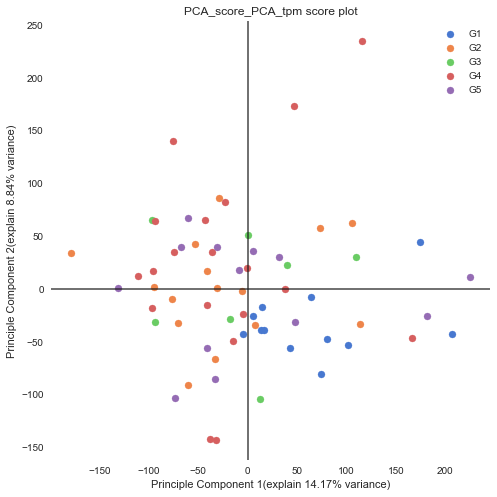

,C002A,C003A,C004A,C005A,C006A,C007A,C008A,C009A,C010A,C011A,...,R046A,R047A,R048A,R049A,R050A,R053A,R054A,R055A,R056A,R057A
PC1,1.640500e+01,6.445508e+01,1.315159e+01,1.427208e+01,-5.073019e+00,5.643212e+00,1.016981e+02,7.410348e+01,2.069885e+02,4.247141e+01,...,1.159283e+02,1.057670e+02,-4.291822e+01,-3.290279e+01,-1.792032e+02,-9.379948e+01,-7.519065e+01,-5.308834e+01,-6.059932e+01,4.650352e+01
PC2,-3.953932e+01,-7.726709e+00,-3.932877e+01,-1.776866e+01,-4.258235e+01,-2.637210e+01,-5.309851e+01,-8.062383e+01,-4.314221e+01,-5.599942e+01,...,2.350520e+02,6.182394e+01,6.536372e+01,-6.650116e+01,3.337951e+01,6.397618e+01,1.398876e+02,4.197522e+01,6.665516e+01,1.729881e+02
PC3,-2.803971e+00,-6.302065e+01,1.812674e+00,-1.366428e+01,3.170863e+01,-4.247405e+00,-5.965771e+01,-4.032433e+01,-6.441078e+01,-5.310943e+01,...,-1.018038e+01,6.934681e+01,-9.931173e+01,-7.890305e+00,2.402277e+01,6.491174e+01,-7.964688e+00,1.870733e+00,-4.680485e-01,2.770000e+01
PC4,-7.487881e+01,-3.742972e+01,-6.038944e+01,-6.117318e+01,-6.291569e+01,-6.758470e+01,-1.318133e+01,-1.974967e+01,4.037165e+01,-3.845205e+01,...,1.631993e+02,-2.152784e+01,1.753270e+01,-1.235936e+01,2.462367e+01,-1.885383e+01,6.413425e+00,-4.800710e+01,-4.750676e+01,3.447219e+01
PC5,1.557418e+01,-1.027681e+01,2.584931e+01,-4.412567e+00,3.780548e+01,8.989349e+00,-1.970472e+00,2.172589e+01,9.897307e+00,4.476371e+01,...,1.274098e+02,-2.019386e+01,3.698968e+00,7.881688e+01,-1.022253e+01,-5.459116e+00,-5.308979e+00,5.752421e+00,2.636669e+01,1.031925e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC62,7.813733e+00,-6.823522e+01,1.751128e+01,3.071327e+01,-9.351473e+00,1.673661e+01,-6.387292e+01,-1.610789e+00,7.914544e+01,-9.484483e-01,...,-9.017622e-01,-3.890399e-01,-2.910851e+01,7.325274e+00,-1.243732e+00,-2.629830e+00,8.193034e+00,6.750983e+00,-7.995963e+00,-4.417438e-01
PC63,1.676260e+00,7.636544e+01,-5.339152e+00,-1.088092e+01,-7.322096e-01,5.195843e-01,-2.803120e+01,-6.367681e+01,3.017235e+01,-1.771530e-01,...,-4.140099e-01,-5.497827e-01,-7.427293e+00,3.316374e+01,3.618586e+00,1.361257e+01,-9.840322e+00,-1.713684e+00,2.137275e+00,1.822682e-01
PC64,3.227476e+00,-6.102666e+01,-4.328484e+00,6.734472e+00,-3.176676e+00,4.439274e+00,9.470687e+01,-4.748575e+01,-8.132406e+00,4.447096e-01,...,1.888307e+00,-4.636083e-01,-3.929611e+01,1.784034e+01,3.680408e-01,-2.992512e+00,1.231776e+00,-2.051392e+00,4.144611e+00,-2.059361e+00
PC65,6.486697e+00,-3.939176e+01,7.862485e+00,4.005774e+00,-1.076147e+01,-3.835426e+00,7.571113e+00,7.473342e+00,1.620469e+00,-1.487796e+00,...,-2.204231e+00,2.465994e-01,1.063877e+02,-1.664739e+00,-4.470227e+00,2.932100e+00,-2.150230e+00,-5.482983e+00,4.512927e+00,1.297650e+00


In [83]:
sns.set(font_scale=0.8)
plt.style.use("seaborn")
plot_embedding(tpm, groups=groups, title="tSNE_tpm", reducer="TSNE", 
               transform_func=transform_func, random_state=42, file_name="../../results/2022March/EDA/TSNE.png", dpi=450)

plot_embedding(rle, groups=groups, title="tSNE_tpm", reducer="TSNE", 
               transform_func=transform_func, random_state=42, file_name="../../results/2022March/EDA/TSNE_rle.png", dpi=450)

plot_embedding(tpm, groups=groups, title="UMAP_tpm", reducer="UMAP", 
               transform_func=transform_func, random_state=42, file_name="../../results/2022March/EDA/UMAP.png", dpi=450)

plot_embedding(rle, groups=groups, title="UMAP_tpm", reducer="UMAP", 
               transform_func=transform_func, random_state=42, file_name="../../results/2022March/EDA/UMAP_rle.png", dpi=450)

plot_PCA(tpm, groups=groups, title="PCA_tpm",
         transform_func=transform_func,
         file_name="../../results/2022March/EDA/PCA.png", dpi=450)

plot_PCA(rle, groups=groups, title="PCA_tpm",
         transform_func=transform_func,
         file_name="../../results/2022March/EDA/PCA_rle.png", dpi=450)